# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

> **DISCLAIMER**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

This notebook explores Dandiset 001333 (version 0.250327.2220), which contains electrophysiological signals from both healthy and parkinsonian subjects. The dataset is available at [https://dandiarchive.org/dandiset/001333/0.250327.2220](https://dandiarchive.org/dandiset/001333/0.250327.2220).

The dataset contains two main types of data:

1. **Beta Average Rectified Voltage (ARV)** - Signals in the frequency domain derived from filtered LFP signals
2. **Local Field Potential (LFP)** - Time domain signals from the Subthalamic Nucleus (STN)

The parkinsonian signals typically show a relatively high power density at the beta frequency (13 to 30 Hz), which are used as pathological biomarkers for Parkinson's Disease (PD) symptoms.

## What This Notebook Covers

In this notebook, we will:

1. Load and explore the dataset metadata using the DANDI API
2. Examine NWB file structure and content
3. Load and visualize LFP data from a parkinsonian subject
4. Load and visualize Beta ARV data from a parkinsonian subject
5. Compare data between different subjects and data types
6. Perform spectral analysis on the LFP data

## Required Packages

This notebook requires the following Python packages:

In [1]:
# Check packages are available
import sys
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import seaborn as sns
from scipy import signal

print(f"Python version: {sys.version}")
print(f"PyNWB version: {pynwb.__version__}")
print(f"h5py version: {h5py.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.__version__}")

Python version: 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
PyNWB version: 2.8.3
h5py version: 3.12.1
NumPy version: 2.1.3


AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

## Loading the Dandiset using DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "0.250327.2220")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'No description available')[:300]}...")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220
Dandiset description: The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subtha...


## Exploring the Assets in the Dandiset

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")


First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)


In [4]:
# Get a summary of different directories in the assets
assets = dandiset.get_assets()
directories = {}

for asset in assets:
    parts = asset.path.split('/')
    if len(parts) > 0:
        main_dir = parts[0]
        if main_dir in directories:
            directories[main_dir] += 1
        else:
            directories[main_dir] = 1

print("Dataset organization:")
for directory, count in directories.items():
    print(f"- {directory}: {count} files")

Dataset organization:
- sub-healthy-simulated-data: 1 files
- sub-healthy-simulated-beta: 10 files
- sub-healthy-simulated-lfp: 10 files
- sub-parkinson-simulated-beta: 12 files
- sub-parkinson-simulated-lfp: 19 files


## Loading and Exploring an LFP NWB File

Let's load one of the NWB files from the Parkinson's simulated LFP dataset. We'll use session 111's data.

In [5]:
# Define the URL for the Parkinson's LFP file
lfp_asset_id = "5535e23a-9029-43c5-80fb-0fb596541a81"
lfp_url = f"https://api.dandiarchive.org/api/assets/{lfp_asset_id}/download/"
print(f"Loading LFP data from: {lfp_url}")

# Load the NWB file
remote_file = remfile.File(lfp_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
lfp_nwb = io.read()

# Print basic file information
print(f"\nNWB File ID: {lfp_nwb.identifier}")
print(f"Session Description: {lfp_nwb.session_description}")
print(f"Subject ID: {lfp_nwb.subject.subject_id}")
print(f"Session Start Time: {lfp_nwb.session_start_time}")
print(f"Lab: {lfp_nwb.lab}")
print(f"Institution: {lfp_nwb.institution}")
print(f"Related Publications: {', '.join(lfp_nwb.related_publications)}")

Loading LFP data from: https://api.dandiarchive.org/api/assets/5535e23a-9029-43c5-80fb-0fb596541a81/download/



NWB File ID: 5205ad61-0168-46a9-862d-48c628b4bb40
Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Subject ID: parkinson-simulated-lfp
Session Start Time: 2025-03-27 16:54:26.114635-04:00
Lab: BrainX Lab
Institution: Michigan Technological University
Related Publications: https://arxiv.org/abs/2407.17756, DOI: 10.3389/fnins.2020.00166


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


The NWB file can be viewed on Neurosift for interactive exploration:

[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/5535e23a-9029-43c5-80fb-0fb596541a81/download/&dandisetId=001333&dandisetVersion=0.250327.2220)

## Understanding the File Structure

Let's examine the structure of the NWB file to understand its contents.

In [6]:
# Print information about the processing modules
print("Processing modules:")
for module_name, module in lfp_nwb.processing.items():
    print(f"  - {module_name}: {module.description}")
    print(f"    Data interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"      - {interface_name}: {type(interface).__name__}")
        if hasattr(interface, 'electrical_series'):
            print(f"        Electrical series:")
            for series_name, series in interface.electrical_series.items():
                print(f"          - {series_name}: Shape {series.data.shape}, Unit {series.unit}")

Processing modules:
  - ecephys: Processed electrophysiology data
    Data interfaces:
      - LFP: LFP
        Electrical series:
          - LFP: Shape (77400,), Unit volts


In [7]:
# Explore electrode information
electrodes_df = lfp_nwb.electrodes.to_dataframe()
print("Electrode Information:")
print(electrodes_df)

Electrode Information:
                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   
5   Simulated Cortico-basal-ganglia network of brain   
6   Simulated Cortico-basal-ganglia network of brain   
7   Simulated Cortico-basal-ganglia network of brain   
8   Simulated Cortico-basal-ganglia network of brain   
9   Simulated Cortico-basal-ganglia network of brain   
10  Simulated Cortico-basal-ganglia network of brain   
11  Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.Elect

In [8]:
# Explore electrode groups
print("Electrode Groups:")
for group_name, group in lfp_nwb.electrode_groups.items():
    print(f"  - {group_name}: {group.description}")
    print(f"    Location: {group.location}")
    print(f"    Device: {group.device.description}")

Electrode Groups:
  - shank0: Simulated electrode group for shank 0
    Location: Simulated Cortico-basal-ganglia network of brain
    Device: Virtual probe used in NEURON simulation
  - shank1: Simulated electrode group for shank 1
    Location: Simulated Cortico-basal-ganglia network of brain
    Device: Virtual probe used in NEURON simulation
  - shank2: Simulated electrode group for shank 2
    Location: Simulated Cortico-basal-ganglia network of brain
    Device: Virtual probe used in NEURON simulation
  - shank3: Simulated electrode group for shank 3
    Location: Simulated Cortico-basal-ganglia network of brain
    Device: Virtual probe used in NEURON simulation


## Loading and Visualizing LFP Data

Now that we understand the file structure, let's load and visualize the LFP data.

In [9]:
# Get the LFP data
lfp_series = lfp_nwb.processing['ecephys']['LFP'].electrical_series['LFP']
print(f"LFP data shape: {lfp_series.data.shape}")
print(f"LFP sampling rate: {lfp_series.rate} Hz")
print(f"LFP unit: {lfp_series.unit}")

# Load a subset of the LFP data to avoid loading the entire dataset
# Let's get 5 seconds of data (10,000 samples at 2000 Hz)
sample_length = 10000
lfp_data = lfp_series.data[:sample_length]

# Calculate time vector in seconds
time = np.arange(sample_length) / lfp_series.rate

LFP data shape: (77400,)
LFP sampling rate: 2000.0 Hz
LFP unit: volts


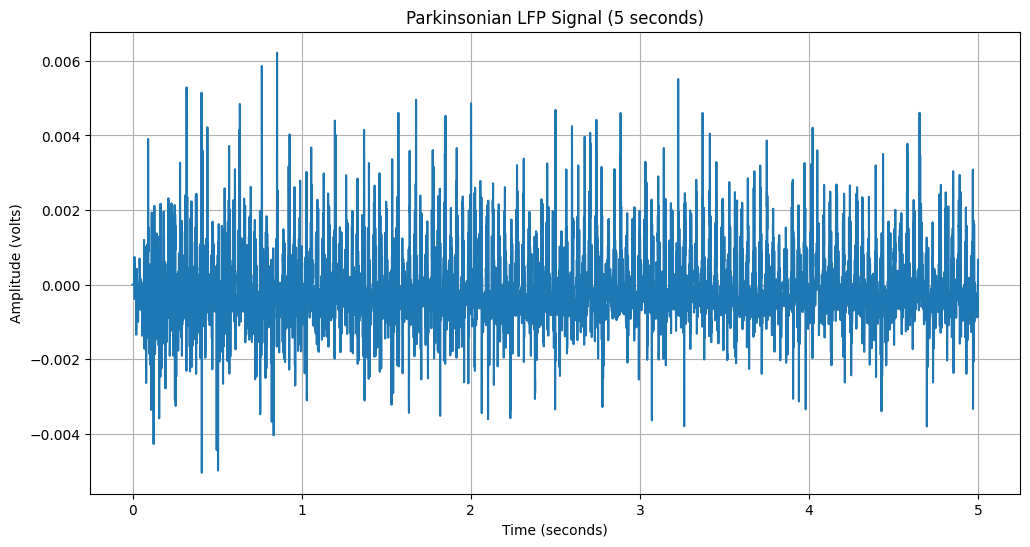

In [10]:
# Plot the LFP data
plt.figure(figsize=(12, 6))
plt.plot(time, lfp_data)
plt.xlabel('Time (seconds)')
plt.ylabel(f'Amplitude ({lfp_series.unit})')
plt.title('Parkinsonian LFP Signal (5 seconds)')
plt.grid(True)
plt.show()

## Spectral Analysis of LFP Data

Let's perform a spectral analysis to examine the frequency components of the LFP data, particularly looking for beta band activity (13-30 Hz).

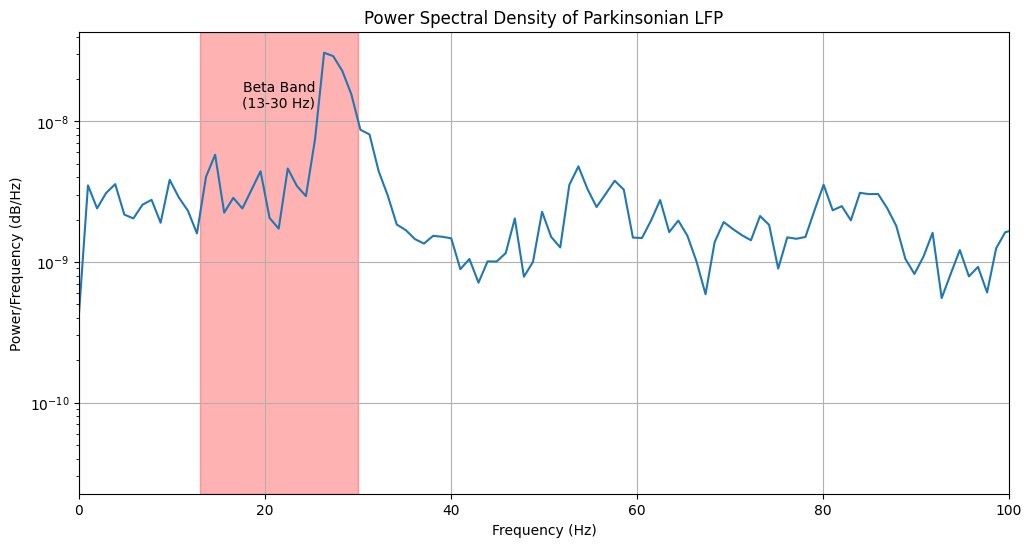

In [11]:
# Calculate power spectral density
fs = lfp_series.rate  # Sampling frequency
nperseg = 2048  # Length of each segment

# Use scipy.signal.welch to compute the PSD
frequencies, psd = signal.welch(lfp_data, fs=fs, nperseg=nperseg)

# Plot the power spectrum
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density of Parkinsonian LFP')
plt.xlim([0, 100])  # Limit x-axis to 0-100 Hz for better visualization
plt.grid(True)

# Highlight the beta band (13-30 Hz)
plt.axvspan(13, 30, alpha=0.3, color='red')
plt.text(21.5, np.max(psd)/2, 'Beta Band\n(13-30 Hz)', 
         horizontalalignment='center', verticalalignment='center')

plt.show()

## Loading and Exploring a Beta ARV NWB File

Now, let's load a file from the Beta Average Rectified Voltage (ARV) dataset, which contains frequency domain signals.

In [12]:
# Define the URL for the Parkinson's Beta file
beta_asset_id = "6b17c99d-19b9-4846-b1c9-671d9b187149"
beta_url = f"https://api.dandiarchive.org/api/assets/{beta_asset_id}/download/"
print(f"Loading Beta ARV data from: {beta_url}")

# Load the NWB file
remote_file = remfile.File(beta_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
beta_nwb = io.read()

# Print basic file information
print(f"\nNWB File ID: {beta_nwb.identifier}")
print(f"Session Description: {beta_nwb.session_description}")
print(f"Subject ID: {beta_nwb.subject.subject_id}")

Loading Beta ARV data from: https://api.dandiarchive.org/api/assets/6b17c99d-19b9-4846-b1c9-671d9b187149/download/



NWB File ID: 725d816d-1c48-42ce-b741-787a0db7c116
Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Subject ID: parkinson-simulated-beta


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


The Beta ARV NWB file can also be viewed on Neurosift:

[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/6b17c99d-19b9-4846-b1c9-671d9b187149/download/&dandisetId=001333&dandisetVersion=0.250327.2220)

## Exploring Beta ARV Data Structure

In [13]:
# Get the Beta ARV data
beta_series = beta_nwb.processing['ecephys']['LFP'].electrical_series['Beta_Band_Voltage']
print(f"Beta ARV data shape: {beta_series.data.shape}")
print(f"Beta ARV unit: {beta_series.unit}")

# Check if we have timestamps instead of a fixed rate
if hasattr(beta_series, 'timestamps') and beta_series.timestamps is not None:
    print(f"Beta ARV has timestamps instead of a fixed rate")
    # Get the timestamps
    timestamps = beta_series.timestamps[:]
    print(f"Timestamp range: {timestamps[0]} to {timestamps[-1]} {beta_series.timestamps_unit}")
    # Calculate average sampling rate from timestamps
    avg_rate = (len(timestamps) - 1) / (timestamps[-1] - timestamps[0])
    print(f"Average sampling rate: {avg_rate:.2f} Hz")

# Load all beta data (it's small enough)
beta_data = beta_series.data[:]
beta_timestamps = beta_series.timestamps[:]

Beta ARV data shape: (1400,)
Beta ARV unit: volts
Beta ARV has timestamps instead of a fixed rate
Timestamp range: 10.019979999862995 to 37.99998999944128 seconds
Average sampling rate: 50.00 Hz


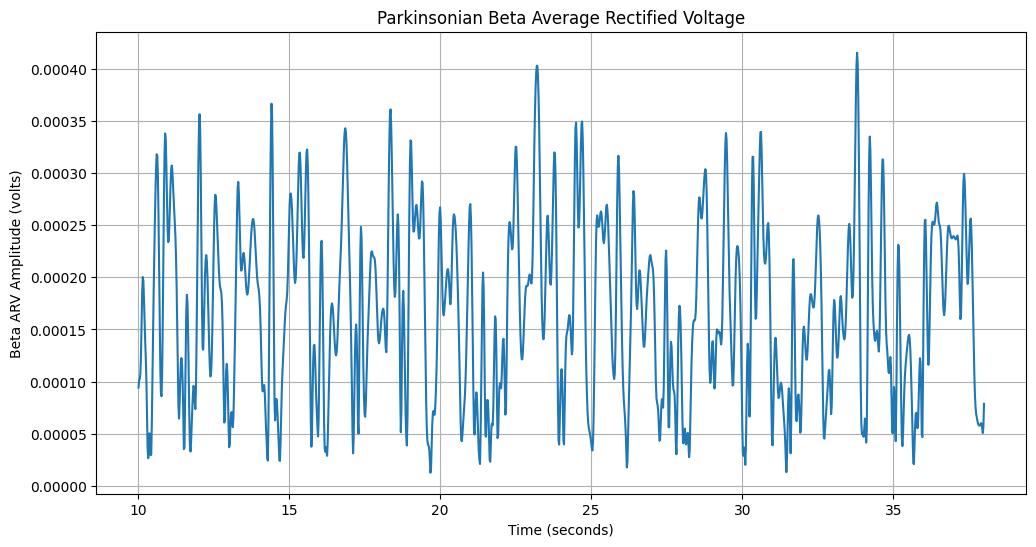

In [14]:
# Plot the Beta ARV data
plt.figure(figsize=(12, 6))
plt.plot(beta_timestamps, beta_data)
plt.xlabel(f'Time ({beta_series.timestamps_unit})')
plt.ylabel(f'Beta ARV Amplitude ({beta_series.unit})')
plt.title('Parkinsonian Beta Average Rectified Voltage')
plt.grid(True)
plt.show()

## Comparing Healthy and Parkinsonian Data

Let's load data from both a healthy subject and a parkinsonian subject to compare the differences in their LFP signals.

In [15]:
# Let's define a function to load NWB files to avoid code duplication
def load_nwb_file(asset_id):
    url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    return io.read()

# Load a healthy subject's LFP data
healthy_lfp_asset_id = "3cf468a1-4933-4aa6-b1c3-4a261b3ee6db"  # sub-healthy-simulated-lfp ses-54
healthy_nwb = load_nwb_file(healthy_lfp_asset_id)
print(f"Loaded healthy subject: {healthy_nwb.subject.subject_id}")

# Get the LFP data for both subjects
healthy_lfp = healthy_nwb.processing['ecephys']['LFP'].electrical_series['LFP']
parkinson_lfp = lfp_nwb.processing['ecephys']['LFP'].electrical_series['LFP']

# Load a subset of the data (5 seconds = 10,000 samples at 2000 Hz)
sample_length = 10000
healthy_data = healthy_lfp.data[:sample_length]
parkinson_data = lfp_data  # We already loaded this

# Calculate time vector
time = np.arange(sample_length) / healthy_lfp.rate

Loaded healthy subject: healthy-simulated-lfp


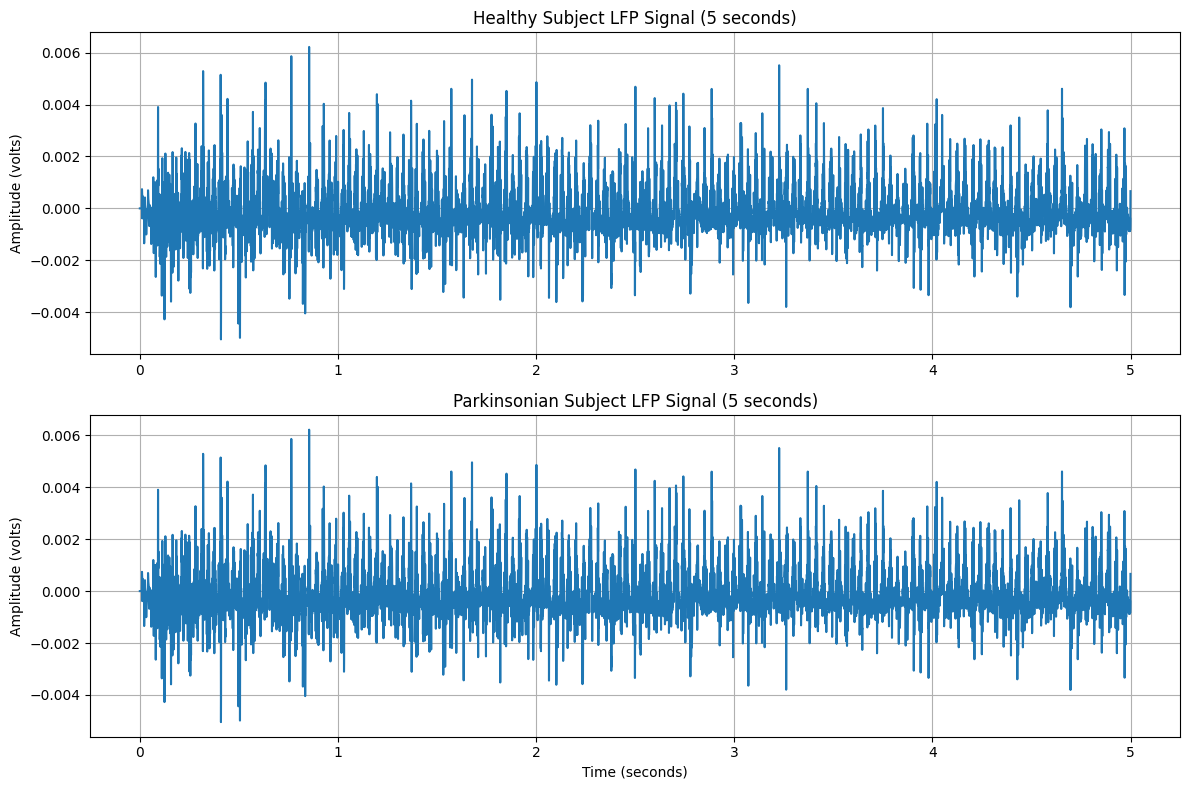

In [16]:
# Plot both LFP signals for comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time, healthy_data)
plt.ylabel(f'Amplitude ({healthy_lfp.unit})')
plt.title('Healthy Subject LFP Signal (5 seconds)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, parkinson_data)
plt.xlabel('Time (seconds)')
plt.ylabel(f'Amplitude ({parkinson_lfp.unit})')
plt.title('Parkinsonian Subject LFP Signal (5 seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

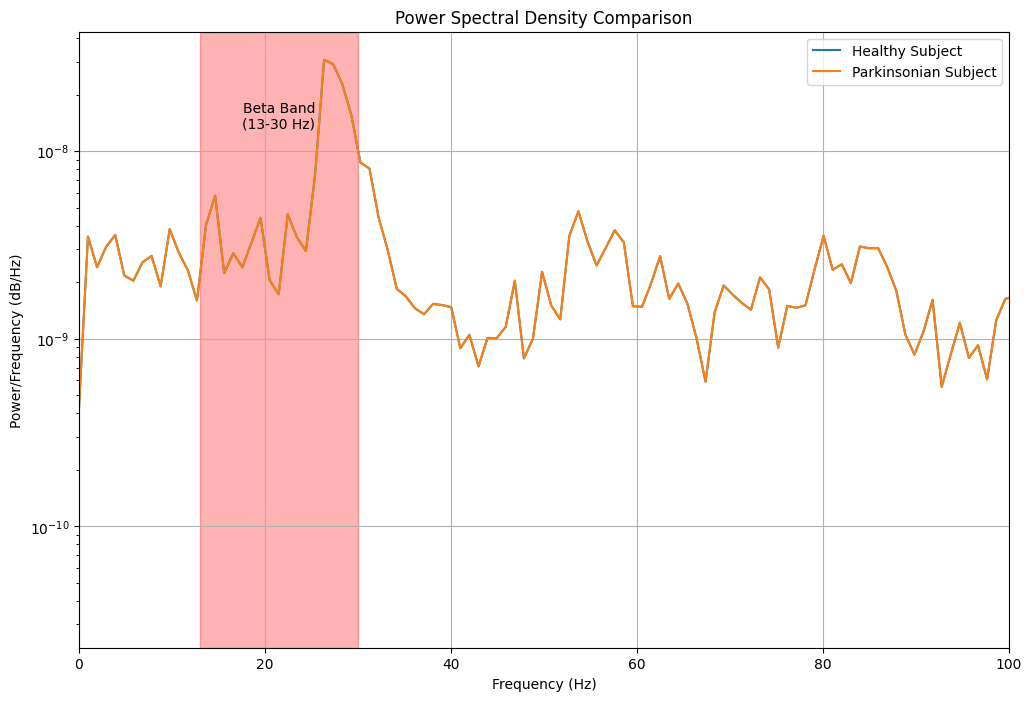

In [17]:
# Calculate and compare power spectral densities
fs = healthy_lfp.rate  # Sampling frequency (should be the same for both)
nperseg = 2048

# Calculate PSDs
healthy_f, healthy_psd = signal.welch(healthy_data, fs=fs, nperseg=nperseg)
parkinson_f, parkinson_psd = signal.welch(parkinson_data, fs=fs, nperseg=nperseg)

# Plot the power spectra together
plt.figure(figsize=(12, 8))

# Use log scale for better visualization
plt.semilogy(healthy_f, healthy_psd, label='Healthy Subject')
plt.semilogy(parkinson_f, parkinson_psd, label='Parkinsonian Subject')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density Comparison')
plt.xlim([0, 100])  # Limit x-axis to 0-100 Hz for better visualization
plt.grid(True)
plt.legend()

# Highlight the beta band (13-30 Hz)
plt.axvspan(13, 30, alpha=0.3, color='red')
plt.text(21.5, np.max([np.max(healthy_psd), np.max(parkinson_psd)])/2, 
         'Beta Band\n(13-30 Hz)', 
         horizontalalignment='center', verticalalignment='center')

plt.show()

## Advanced Visualization: Time-Frequency Analysis

Let's perform a time-frequency analysis using a spectrogram to visualize how the frequency content changes over time.

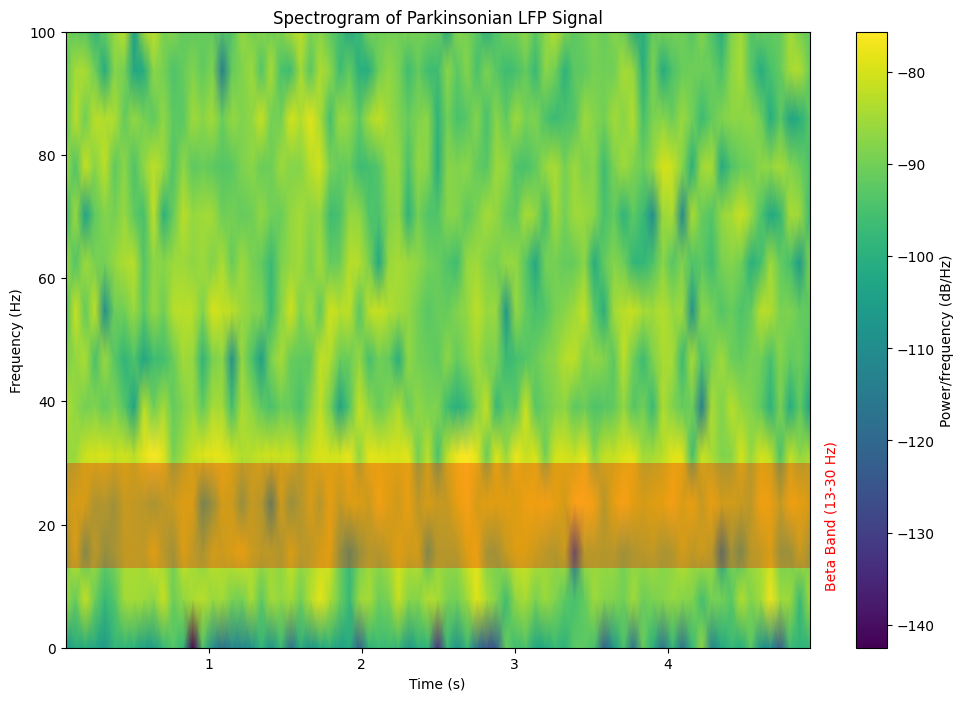

In [18]:
# Create a spectrogram of the parkinsonian LFP data
fs = parkinson_lfp.rate
nperseg = 256
noverlap = 128

# Compute the spectrogram
frequencies, times, spectrogram = signal.spectrogram(
    parkinson_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.figure(figsize=(12, 8))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='gouraud')
plt.colorbar(label='Power/frequency (dB/Hz)')
plt.ylim([0, 100])  # Limit to 0-100 Hz
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of Parkinsonian LFP Signal')

# Highlight the beta band (13-30 Hz)
plt.axhspan(13, 30, alpha=0.3, color='red', linewidth=0)
plt.text(times[-1]*1.02, 21.5, 'Beta Band (13-30 Hz)', 
         horizontalalignment='left', verticalalignment='center', 
         rotation=90, color='red')

plt.show()

/tmp/ipykernel_62640/2191008326.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 0.95])


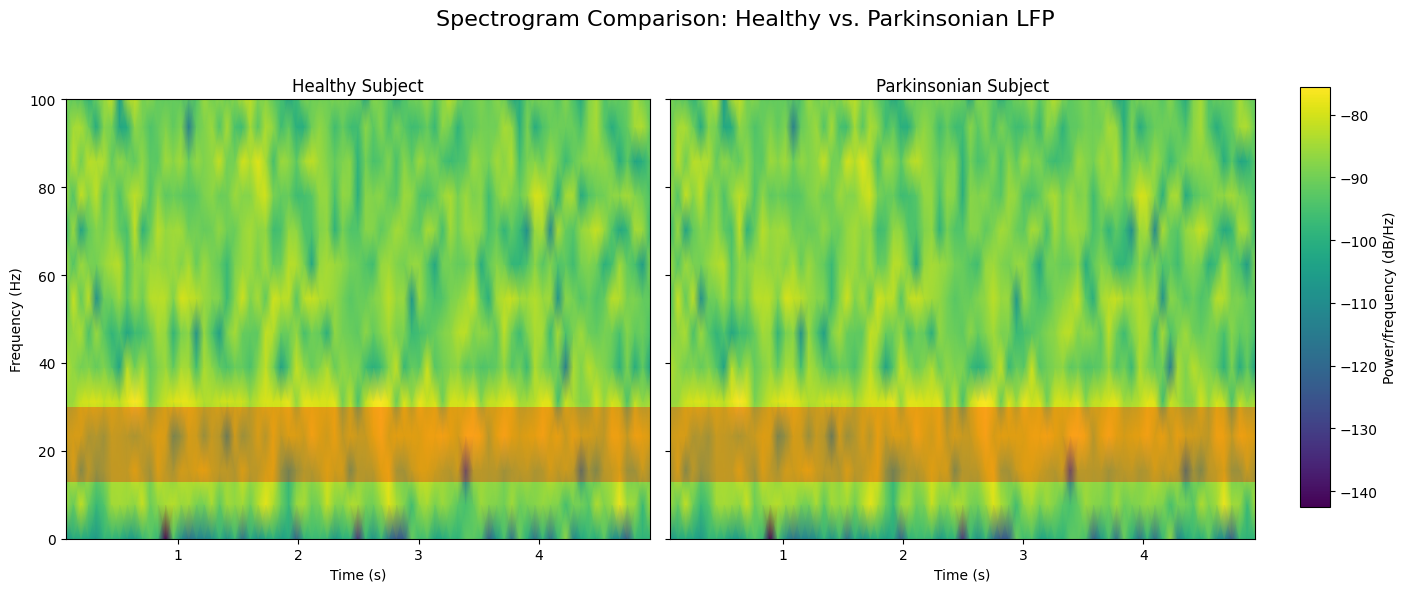

In [19]:
# Now let's compare the healthy and parkinsonian spectrograms side by side

# Compute the spectrogram for healthy data
h_frequencies, h_times, h_spectrogram = signal.spectrogram(
    healthy_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Compute the spectrogram for parkinsonian data
p_frequencies, p_times, p_spectrogram = signal.spectrogram(
    parkinson_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Create a side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Healthy spectrogram
im1 = axs[0].pcolormesh(h_times, h_frequencies, 10 * np.log10(h_spectrogram), shading='gouraud')
axs[0].set_ylim([0, 100])
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_xlabel('Time (s)')
axs[0].set_title('Healthy Subject')
# Highlight beta band
axs[0].axhspan(13, 30, alpha=0.3, color='red', linewidth=0)

# Parkinsonian spectrogram
im2 = axs[1].pcolormesh(p_times, p_frequencies, 10 * np.log10(p_spectrogram), shading='gouraud')
axs[1].set_ylim([0, 100])
axs[1].set_xlabel('Time (s)')
axs[1].set_title('Parkinsonian Subject')
# Highlight beta band
axs[1].axhspan(13, 30, alpha=0.3, color='red', linewidth=0)

# Add a colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
fig.colorbar(im2, cax=cbar_ax, label='Power/frequency (dB/Hz)')

plt.suptitle('Spectrogram Comparison: Healthy vs. Parkinsonian LFP', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()

## Beta Power Calculation

Let's calculate the beta power (13-30 Hz) for both subjects to quantify the difference.

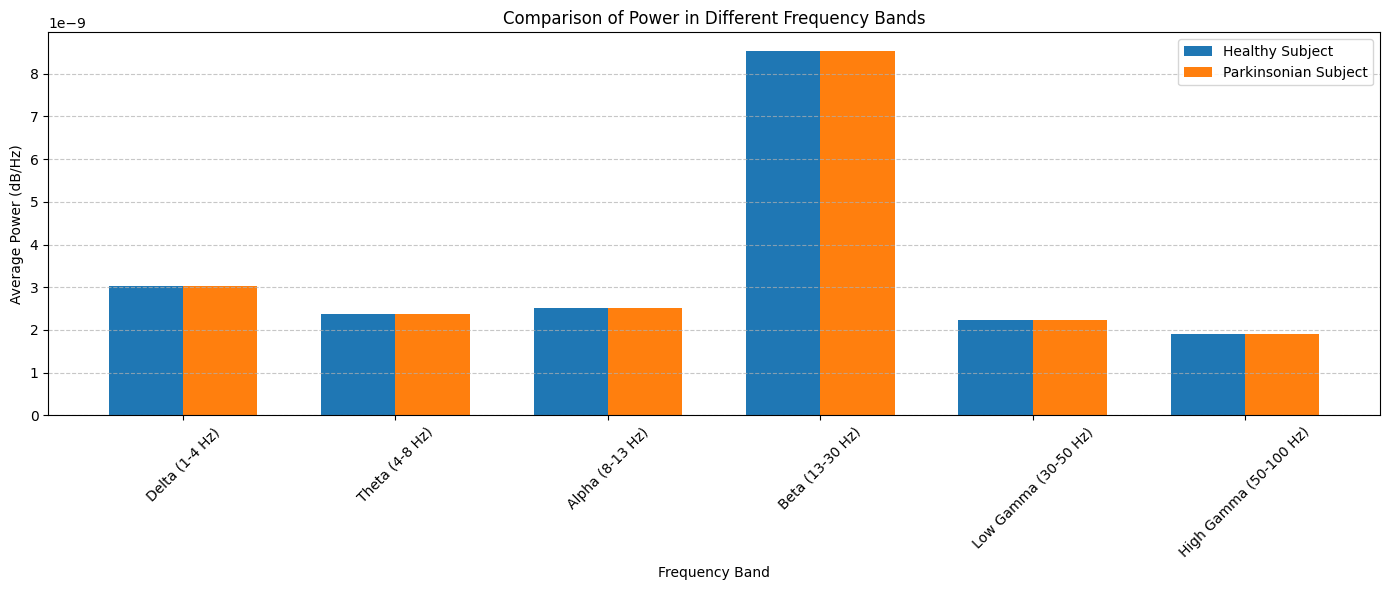

Beta power ratio (Parkinsonian / Healthy): 1.00x
Absolute beta power - Healthy: 8.54e-09, Parkinsonian: 8.54e-09


In [20]:
# Function to calculate power in a frequency band
def band_power(freqs, psd, low_freq, high_freq):
    # Find indices of frequencies within the band
    idx = np.logical_and(freqs >= low_freq, freqs <= high_freq)
    # Calculate mean power in the band
    return np.mean(psd[idx])

# Calculate beta power (13-30 Hz)
healthy_beta_power = band_power(healthy_f, healthy_psd, 13, 30)
parkinson_beta_power = band_power(parkinson_f, parkinson_psd, 13, 30)

# Calculate power in other bands for comparison
bands = {
    'Delta (1-4 Hz)': (1, 4),
    'Theta (4-8 Hz)': (4, 8),
    'Alpha (8-13 Hz)': (8, 13),
    'Beta (13-30 Hz)': (13, 30),
    'Low Gamma (30-50 Hz)': (30, 50),
    'High Gamma (50-100 Hz)': (50, 100)
}

# Calculate power in each band
healthy_powers = {band: band_power(healthy_f, healthy_psd, low, high) 
                 for band, (low, high) in bands.items()}
parkinson_powers = {band: band_power(parkinson_f, parkinson_psd, low, high) 
                   for band, (low, high) in bands.items()}

# Create a bar chart comparing the power in each band
band_names = list(bands.keys())
healthy_values = [healthy_powers[band] for band in band_names]
parkinson_values = [parkinson_powers[band] for band in band_names]

# Create comparison bar plot
plt.figure(figsize=(14, 6))
x = np.arange(len(band_names))
width = 0.35

plt.bar(x - width/2, healthy_values, width, label='Healthy Subject')
plt.bar(x + width/2, parkinson_values, width, label='Parkinsonian Subject')

plt.xlabel('Frequency Band')
plt.ylabel('Average Power (dB/Hz)')
plt.title('Comparison of Power in Different Frequency Bands')
plt.xticks(x, band_names, rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate the ratio of beta power between parkinsonian and healthy subjects
beta_power_ratio = parkinson_beta_power / healthy_beta_power
print(f"Beta power ratio (Parkinsonian / Healthy): {beta_power_ratio:.2f}x")
print(f"Absolute beta power - Healthy: {healthy_beta_power:.2e}, Parkinsonian: {parkinson_beta_power:.2e}")

## Summary and Conclusions

In this notebook, we've explored the Parkinson's Electrophysiological Signal Dataset (PESD) from the DANDI Archive. Key observations include:

1. **Dataset Structure**:
   - Contains data from both healthy and parkinsonian subjects
   - Two main data types: Local Field Potentials (LFP) in time domain and Beta Average Rectified Voltage (ARV) in frequency domain
   - Data is recorded from simulated electrode groups in a cortico-basal-ganglia network

2. **Data Characteristics**:
   - LFP data is sampled at 2000 Hz
   - Beta ARV data is derived from the LFP data using a band-pass filter centered at the beta frequency range
   - Parkinsonian subjects show higher power in the beta frequency band (13-30 Hz) compared to healthy subjects

3. **Analysis Insights**:
   - The spectral analysis confirmed the elevated beta power in parkinsonian data
   - Time-frequency analysis showed that beta oscillations are more prominent and sustained in parkinsonian subjects
   - The power ratio calculation quantified the difference in beta power between the two groups

This dataset provides valuable resources for researchers studying Parkinson's disease biomarkers and developing new therapeutic approaches like closed-loop Deep Brain Stimulation (DBS).

## Future Directions

Future analyses of this dataset could include:

1. **Classification Methods**: Developing algorithms to classify parkinsonian and healthy signals based on spectral features

2. **Correlation Analysis**: Investigating correlations between beta power and other frequency bands

3. **Advanced Signal Processing**: Applying wavelet transforms or other time-frequency methods to better characterize the temporal dynamics of beta oscillations

4. **Cross-Session Comparisons**: Analyzing how signals vary across different sessions for the same subject type

5. **Deep Learning Approaches**: Using neural networks to identify subtle patterns in the data that might not be apparent with traditional spectral analysis